<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章 サポートベクトルマシン

## 7.1 マージンを最大とする識別面を求める

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.svm import SVC

乱数を使って、データを生成
* 2クラス
* 特徴ベクトルは2次元（冗長な次元はなし）
* 各クラスにつき一つの正規分布からデータを生成
* ランダムにクラスを反転させることは行わない
* クラスが適度に分かれているように調整

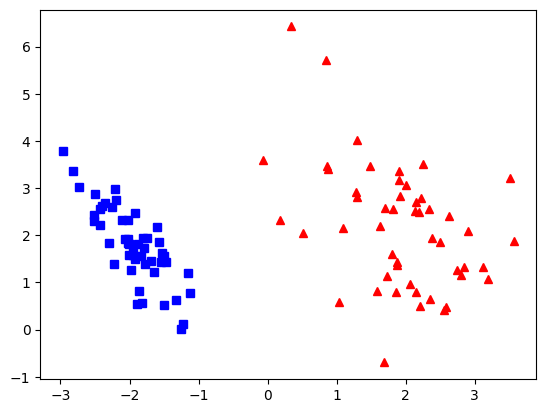

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")
plt.show()

線形カーネル(linear)は、この特徴空間でマージン最大化を行うものです。

In [3]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

識別面を表示します。各クラスのサポートベクトルと識別面の距離が等しくなっているのがわかります。

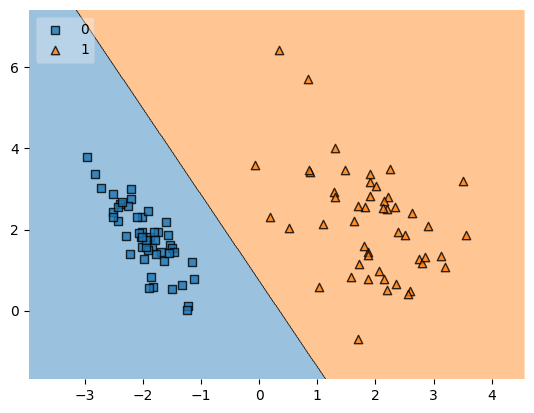

In [4]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

## 7.2 ソフトマージンによる誤識別データの吸収

クラスの分離度(class_sep)の値を少し小さくして、やや難しいデータを作成し、同様の手順でSVMによる識別を行います。線型分離不可能なデータなので、スラック変数の重み$C$を引数で与えます。

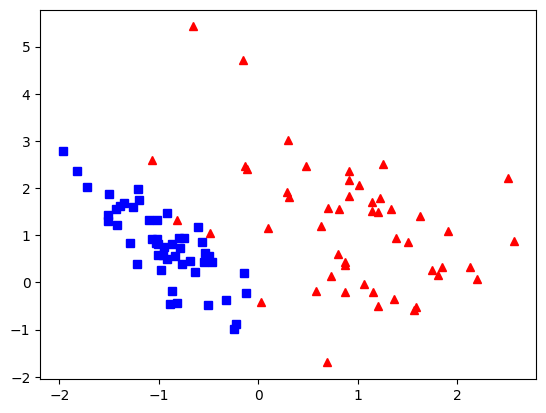

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=1.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")
plt.show()

In [6]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, kernel='linear')

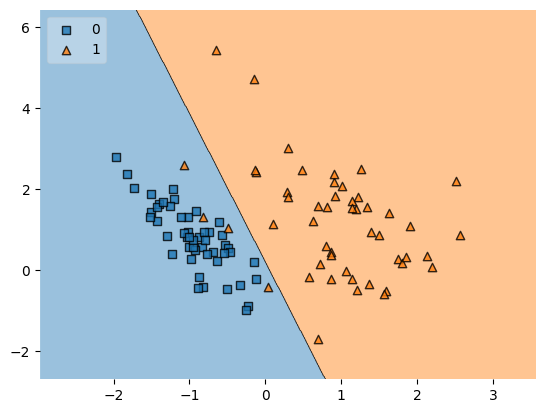

In [7]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

## 7.3 カーネル関数を用いたSVM

非線形識別面での識別を行うので、さらにデータを複雑なものにします。

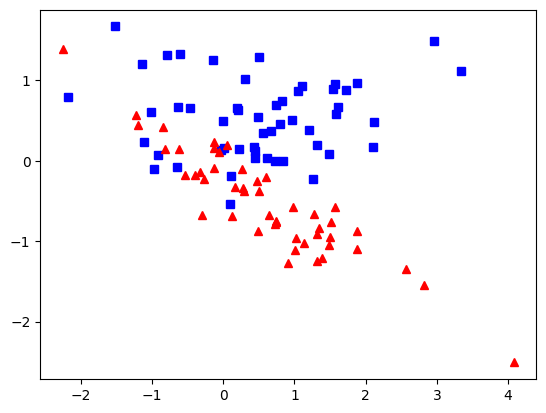

In [8]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=3)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")
plt.show()

多項式カーネル

In [9]:
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X, y)

SVC(C=1, kernel='poly')

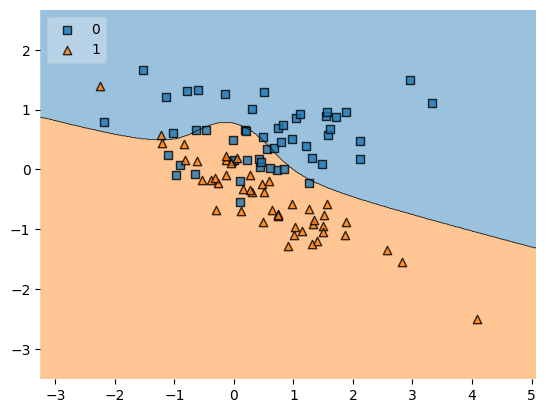

In [10]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

RBFカーネル

In [11]:
clf = SVC(kernel='rbf', gamma=1, C=1)
clf.fit(X, y)

SVC(C=1, gamma=1)

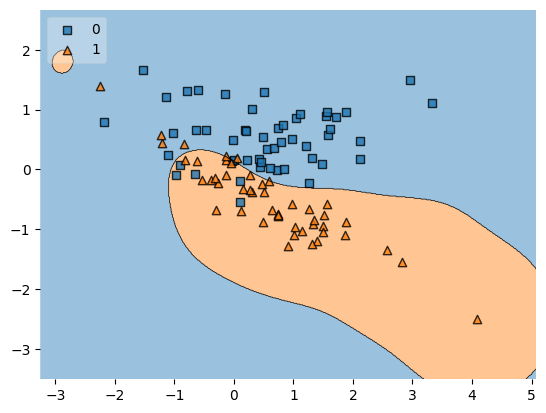

In [12]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

## 7.4 ハイパーパラメータのグリッドサーチ

In [13]:
from sklearn.model_selection import GridSearchCV

「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせでGridSearchを行います。

パラメータとして多項式カーネルを与えて、サポートベクトルマシン[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)のインスタンスsvcを作成します。

In [14]:
svc = SVC(kernel='poly')
svc

SVC(kernel='poly')

GridSearchを行います。「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせで、リストを値とするディクショナリの配列param\_gridを作成します。

In [15]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [1,2,3]}
 ]

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は5-fold CVで評価されます。許容できる実行時間を考えて、この値を調整します。

In [16]:
clf = GridSearchCV(svc, param_grid, cv=3)
clf.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(kernel='poly'),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3]}])

結果はcv\_results\_属性の値として、辞書型で得られます。また、容易にpandasのDataFrame型に変換できます。

In [17]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001898,0.000216,0.004532,0.002569,0.1,1,"{'C': 0.1, 'degree': 1}",0.823529,0.848485,0.787879,0.819964,0.024870,6
1,0.001740,0.000126,0.001158,0.000137,0.1,2,"{'C': 0.1, 'degree': 2}",0.705882,0.666667,0.696970,0.689840,0.016785,15
2,0.001491,0.000047,0.001078,0.000035,0.1,3,"{'C': 0.1, 'degree': 3}",0.882353,0.696970,0.727273,0.768865,0.081196,11
3,0.001436,0.000039,0.001004,0.000011,1,1,"{'C': 1, 'degree': 1}",0.911765,0.848485,0.787879,0.849376,0.050580,4
4,0.001422,0.000063,0.001010,0.000047,1,2,"{'C': 1, 'degree': 2}",0.764706,0.787879,0.696970,0.749851,0.038571,13
5,0.001426,0.000051,0.000986,0.000033,1,3,"{'C': 1, 'degree': 3}",0.823529,0.848485,0.787879,0.819964,0.024870,6
6,0.001478,0.000074,0.000986,0.000051,10,1,"{'C': 10, 'degree': 1}",0.970588,0.878788,0.818182,0.889186,0.062653,1
7,0.001576,0.000132,0.000966,0.000031,10,2,"{'C': 10, 'degree': 2}",0.764706,0.787879,0.696970,0.749851,0.038571,13
8,0.001527,0.000114,0.000989,0.000028,10,3,"{'C': 10, 'degree': 3}",0.764706,0.727273,0.878788,0.790255,0.064440,9
9,0.002199,0.000725,0.000953,0.000020,100,1,"{'C': 100, 'degree': 1}",0.970588,0.878788,0.818182,0.889186,0.062653,1


すべてのパラメータの組み合わせについて、スコアを表示します。

In [18]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print(f"{mean_score:.3f} (+/- {std_score*2:.3f}) for {params}")

0.820 (+/- 0.050) for {'C': 0.1, 'degree': 1}
0.690 (+/- 0.034) for {'C': 0.1, 'degree': 2}
0.769 (+/- 0.162) for {'C': 0.1, 'degree': 3}
0.849 (+/- 0.101) for {'C': 1, 'degree': 1}
0.750 (+/- 0.077) for {'C': 1, 'degree': 2}
0.820 (+/- 0.050) for {'C': 1, 'degree': 3}
0.889 (+/- 0.125) for {'C': 10, 'degree': 1}
0.750 (+/- 0.077) for {'C': 10, 'degree': 2}
0.790 (+/- 0.129) for {'C': 10, 'degree': 3}
0.889 (+/- 0.125) for {'C': 100, 'degree': 1}
0.780 (+/- 0.077) for {'C': 100, 'degree': 2}
0.820 (+/- 0.083) for {'C': 100, 'degree': 3}
0.889 (+/- 0.125) for {'C': 1000, 'degree': 1}
0.760 (+/- 0.055) for {'C': 1000, 'degree': 2}
0.810 (+/- 0.023) for {'C': 1000, 'degree': 3}


性能が最大となるパラメータとそのときのスコアを表示します。

In [19]:
clf.best_params_

{'C': 10, 'degree': 1}

In [20]:
clf.best_score_

0.8891859774212715

ガウス過程回帰の説明

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import gaussian_process
from sklearn.gaussian_process import kernels

In [22]:
X = np.array([-4, -3, -1, 0, 2])
y = np.array([-2, 0,-1, 2, -1])
xs = np.linspace(-5, 5, 101)
kernel = kernels.RBF(length_scale=np.sqrt(2)) + kernels.WhiteKernel(noise_level=0.05)

In [23]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel, optimizer=None)
gp.fit(X[:, None], y)
mu, std = gp.predict(xs[:, None], return_std=True)

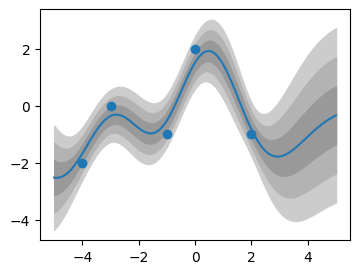

In [24]:
plt.figure(figsize=(4,3))
plt.plot(xs, mu)
for i in [3, 2, 1]:
  plt.fill_between(xs, mu+i*std, mu-i*std, color=str(0.5+0.1*i))
plt.scatter(X, y)
plt.show()

Optuna

In [25]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.3 MB/s eta 0:00:00


In [26]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import optuna

In [27]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [28]:
def objective(trial):
  gamma = trial.suggest_float('gamma', 1e-3, 1e3)
  C = trial.suggest_float('C', 1e-3, 1e3)
  reg = SVR(kernel='rbf', gamma=gamma, C=C)
  score = cross_val_score(reg, X, y, cv=3, scoring="r2")
  r2_mean = score.mean()
  return r2_mean

In [29]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=30)
print('params:', study.best_params)

[I 2023-10-18 06:04:01,323] A new study created in memory with name: no-name-92a0ab18-0970-4cea-961a-c194057d467a
[I 2023-10-18 06:04:01,402] Trial 0 finished with value: 0.12882827952446277 and parameters: {'gamma': 595.6704638679278, 'C': 518.9009230691257}. Best is trial 0 with value: 0.12882827952446277.
[I 2023-10-18 06:04:01,459] Trial 1 finished with value: 0.15749194857180662 and parameters: {'gamma': 530.8584580752529, 'C': 702.3897234270601}. Best is trial 1 with value: 0.15749194857180662.
[I 2023-10-18 06:04:01,522] Trial 2 finished with value: 0.06161259154526647 and parameters: {'gamma': 836.1278460644359, 'C': 789.3785719588551}. Best is trial 1 with value: 0.15749194857180662.
[I 2023-10-18 06:04:01,593] Trial 3 finished with value: 0.06724975095736967 and parameters: {'gamma': 807.1625397952158, 'C': 407.41802484443707}. Best is trial 1 with value: 0.15749194857180662.
[I 2023-10-18 06:04:01,658] Trial 4 finished with value: 0.35614678316621307 and parameters: {'gamma'

params: {'gamma': 12.353205541661309, 'C': 39.74875332089883}


In [30]:
optuna.visualization.plot_contour(study)

## 課題

GridSearchCV でscikit-learn付属の wine データに対する多項式カーネルサポートベクトルマシン(SVC) 識別の最適なハイパーパラメータ(Cとdegree)の組み合わせを求めてください。余裕があれば、多項式カーネル以外にRBFカーネルも探索の対象として最適なパラメータの組み合わせを求めてください。


### 解答例


SVMは2値分類問題に適用可能な識別器なので、多値分類に用いるときは、以下のいずれかの方法をとる必要があります。

* one-versus-rest法 ('ovr')
  * 各クラスについて、そのクラスに属するかどうかを識別するSVMを作る
  * ２つ以上のクラスに属すると判定された場合は識別面からの距離が大きいものに分類する
* ペアワイズ法 ('ovo')
  * クラス対ごとに識別器を作る
  * 判定は多数決を取る

scikit-learnではSVCの引数decision_function_shapeで指定し、デフォルトは 'ovr' です

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [32]:
wine = load_wine()
X = wine.data
y = wine.target

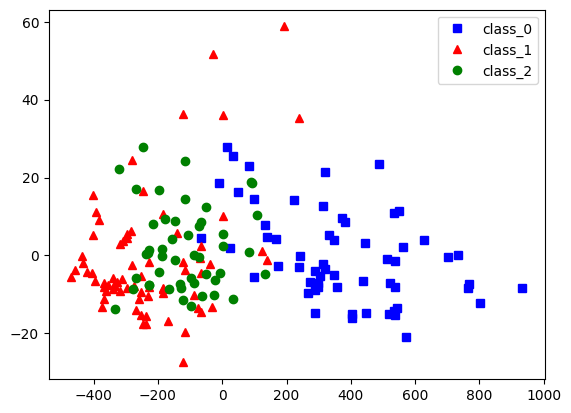

In [33]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"bs", label=wine.target_names[0])
plt.plot(X2[y==1,0], X2[y==1,1],"r^", label=wine.target_names[1])
plt.plot(X2[y==2,0], X2[y==2,1],"go", label=wine.target_names[2])
plt.legend()
plt.show()

In [34]:
svc = SVC()
svc

SVC()

GridSearchを行います。「スラック変数の重みC」と「カーネルとパラメータの組み合わせ」を2組作って、ディクショナリの配列param\_gridを作成します。

In [35]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000, 10000], 'kernel': ['poly'], 'degree': [1,2,3]},
  {'C': [0.1, 1, 10, 100, 1000, 10000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001]},
 ]

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearch](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は5-fold CVで評価されます。

In [36]:
clf = GridSearchCV(svc, param_grid, return_train_score=True)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 10000],
                          'degree': [1, 2, 3], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000, 10000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             return_train_score=True)

すべてのパラメータの組み合わせについて、スコアを表示します。

In [37]:
re = clf.cv_results_
df = pd.DataFrame(re)
df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'degree': 1, 'kernel': 'poly'}",0.657778,35
1,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.651905,39
2,"{'C': 0.1, 'degree': 3, 'kernel': 'poly'}",0.646349,40
3,"{'C': 1, 'degree': 1, 'kernel': 'poly'}",0.663333,30
4,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.652222,36
5,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.652222,36
6,"{'C': 10, 'degree': 1, 'kernel': 'poly'}",0.703016,23
7,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",0.669365,29
8,"{'C': 10, 'degree': 3, 'kernel': 'poly'}",0.680159,27
9,"{'C': 100, 'degree': 1, 'kernel': 'poly'}",0.748095,18


性能が最大となるパラメータとそのときのスコアを表示します。

In [38]:
clf.best_params_

{'C': 10000, 'degree': 1, 'kernel': 'poly'}

In [39]:
clf.best_score_

0.9498412698412698

Xを2次元データとして、識別面のおおまかなイメージを確認します。

In [40]:
svc2 = SVC(kernel='poly', degree=1, C=10000)

In [41]:
svc2.fit(X2, y)

SVC(C=10000, degree=1, kernel='poly')

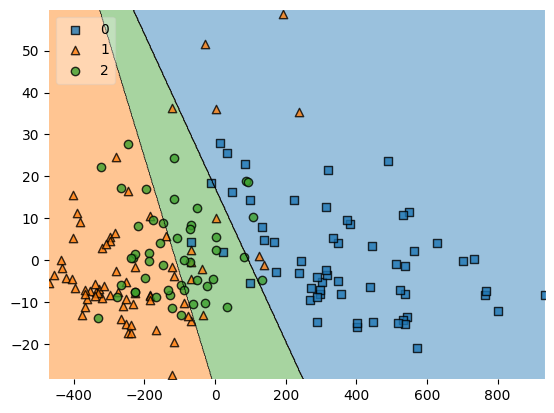

In [42]:
plot_decision_regions(X=X2, y=y, clf=svc2, legend=2)
plt.show()